# Task 4

In [1]:
import pandas as pd
import numpy as np
import scipy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Part I

Apply the logistic regression method using the functions in the notebook «Logistic Regression as a Neural Network – BP alg.ipynb” to predict the biological response of a molecule 

data: bioresponse.csv, 

description from Kaggle: “The data is in the comma separated values (CSV) format. Each row in this data set represents a molecule. The first column contains experimental data describing a real biological response; the molecule was seen to elicit this response (1), or not (0). The remaining columns represent molecular descriptors (d1 through d1776), these are caclulated properties that can capture some of the characteristics of the molecule - for example size, shape, or elemental constitution. The descriptor matrix has been normalized.”). 

Use 75% of the dataset to train the model, and the rest of the data to estimate its accuracy.

In [3]:
data = pd.read_csv("/Users/andreiivlev/Desktop/ITMO/MLT/task4/bioresponse.csv")

In [4]:
X = data.drop('Activity', axis=1)
y = data['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [5]:
y_train = np.array(y_train).reshape(1, -1)
y_test = np.array(y_test).reshape(1, -1)
X_train = X_train.T
X_test = X_test.T

In [6]:
data

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    
    return s

In [8]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

In [9]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [10]:
# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [11]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

In [12]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False, method = 'GD'):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Choose your method
    if method == 'ADAM':
        parameters, grads, costs = optimize_adam(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    elif method == 'SGD':
        parameters, grads, costs = optimize_sgd(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    else:
        parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [13]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True)


Cost after iteration 0: 0.693147
Cost after iteration 100: 0.680547
Cost after iteration 200: 0.673636
Cost after iteration 300: 0.667458
Cost after iteration 400: 0.661693
Cost after iteration 500: 0.656284
Cost after iteration 600: 0.651192
Cost after iteration 700: 0.646387
Cost after iteration 800: 0.641843
Cost after iteration 900: 0.637534
Cost after iteration 1000: 0.633443
Cost after iteration 1100: 0.629549
Cost after iteration 1200: 0.625838
Cost after iteration 1300: 0.622295
Cost after iteration 1400: 0.618907
Cost after iteration 1500: 0.615663
Cost after iteration 1600: 0.612552
Cost after iteration 1700: 0.609566
Cost after iteration 1800: 0.606695
Cost after iteration 1900: 0.603932
train accuracy: 73.16032705296836 %
test accuracy: 71.96162046908316 %


# Part II

Modify optimize() function to implement the stochastic gradient descent (SGD) method and Adam optimization method using the numpy library. Apply them to solve the problem from p.1.

In [14]:
def optimize_sgd(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    X = np.array(X)
    Y = np.array(Y)
    
    for i in range(num_iterations):
        for j in range(X.shape[1]):
            # Use only one sample for each iteration
            X_sample = X[:, j].reshape(-1, 1)
            Y_sample = Y[:, j].reshape(-1, 1)

            grads, cost = propagate(w, b, X_sample, Y_sample)

            dw = grads["dw"]
            db = grads["db"]

            w -= learning_rate * dw
            b -= learning_rate * db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs


In [15]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True, method = 'SGD')


Cost after iteration 0: 1.376961
Cost after iteration 100: 0.577881
Cost after iteration 200: 0.286499
Cost after iteration 300: 0.197403
Cost after iteration 400: 0.154764
Cost after iteration 500: 0.129534
Cost after iteration 600: 0.112726
Cost after iteration 700: 0.100637
Cost after iteration 800: 0.091443
Cost after iteration 900: 0.084139
Cost after iteration 1000: 0.078130
Cost after iteration 1100: 0.073047
Cost after iteration 1200: 0.068652
Cost after iteration 1300: 0.064788
Cost after iteration 1400: 0.061345
Cost after iteration 1500: 0.058247
Cost after iteration 1600: 0.055438
Cost after iteration 1700: 0.052876
Cost after iteration 1800: 0.050527
Cost after iteration 1900: 0.048365
train accuracy: 90.79274795591894 %
test accuracy: 74.6268656716418 %


In [16]:
def optimize_adam(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    v_dw = 0
    v_db = 0
    s_dw = 0
    s_db = 0
    epsilon = 1e-8
    beta1 = 0.9
    beta2 = 0.999
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        
        v_dw = beta1 * v_dw + (1 - beta1) * dw
        v_db = beta1 * v_db + (1 - beta1) * db

        s_dw = beta2 * s_dw + (1 - beta2) * np.square(dw)
        s_db = beta2 * s_db + (1 - beta2) * np.square(db)

        v_dw_corrected = v_dw / (1 - np.power(beta1, i+1))
        v_db_corrected = v_db / (1 - np.power(beta1, i+1))

        s_dw_corrected = s_dw / (1 - np.power(beta2, i+1))
        s_db_corrected = s_db / (1 - np.power(beta2, i+1))

        w -= learning_rate * v_dw_corrected / (np.sqrt(s_dw_corrected) + epsilon)
        b -= learning_rate * v_db_corrected / (np.sqrt(s_db_corrected) + epsilon)

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs


In [17]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.001, print_cost = True, method = 'ADAM')


Cost after iteration 0: 0.693147
Cost after iteration 100: 0.500659
Cost after iteration 200: 0.441412
Cost after iteration 300: 0.407281
Cost after iteration 400: 0.383427
Cost after iteration 500: 0.365177
Cost after iteration 600: 0.350479
Cost after iteration 700: 0.338235
Cost after iteration 800: 0.327779
Cost after iteration 900: 0.318673
Cost after iteration 1000: 0.310617
Cost after iteration 1100: 0.303392
Cost after iteration 1200: 0.296841
Cost after iteration 1300: 0.290846
Cost after iteration 1400: 0.285315
Cost after iteration 1500: 0.280179
Cost after iteration 1600: 0.275382
Cost after iteration 1700: 0.270880
Cost after iteration 1800: 0.266636
Cost after iteration 1900: 0.262620
train accuracy: 90.47280483469605 %
test accuracy: 74.09381663113007 %


# Part III

For three modifications of gradient descent (GD, SGD and Adam) plot the learning curves (dependence of the value of the loss function on the iteration number), apply models with different values ​​of the learning rate (at least 5 different learning rates). How does it affect the accuracy of the model? 

train accuracy: 78.99040170636331 %
test accuracy: 76.22601279317698 %
train accuracy: 77.07074297902595 %
test accuracy: 74.6268656716418 %
train accuracy: 73.16032705296836 %
test accuracy: 71.96162046908316 %
train accuracy: 68.9655172413793 %
test accuracy: 71.1087420042644 %
train accuracy: 55.31461073586918 %
test accuracy: 57.569296375266525 %


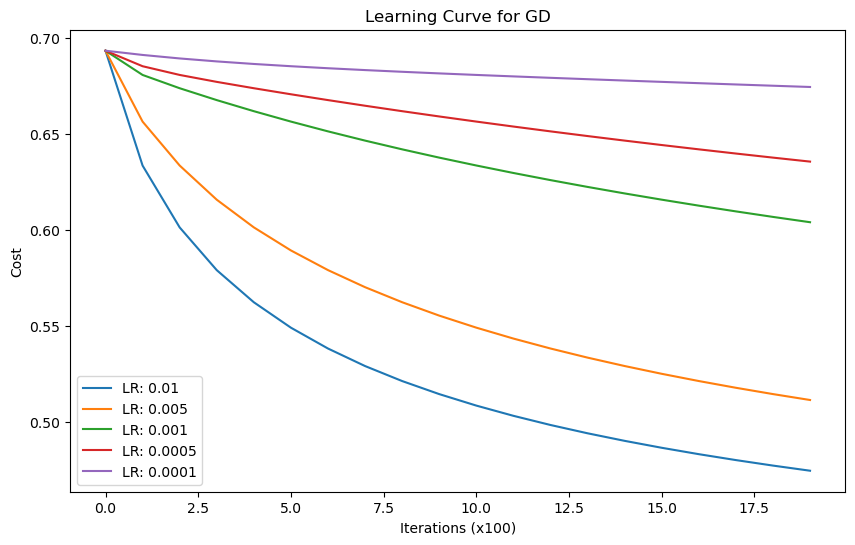

In [22]:
learning_rates = [0.01, 0.005, 0.001, 0.0005, 0.0001]

plt.figure(figsize=(10,6))
for lr in learning_rates:
    d = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=lr, print_cost=False, method='GD')
    plt.plot(d["costs"], label=f"LR: {lr}")

plt.title(f'Learning Curve for GD')
plt.xlabel('Iterations (x100)')
plt.ylabel('Cost')
plt.legend()
plt.show()

train accuracy: 93.81443298969072 %
test accuracy: 72.60127931769722 %
train accuracy: 93.38784216139354 %
test accuracy: 73.34754797441364 %
train accuracy: 90.79274795591894 %
test accuracy: 74.6268656716418 %
train accuracy: 89.22858158549592 %
test accuracy: 74.6268656716418 %
train accuracy: 86.27799502310701 %
test accuracy: 76.33262260127933 %


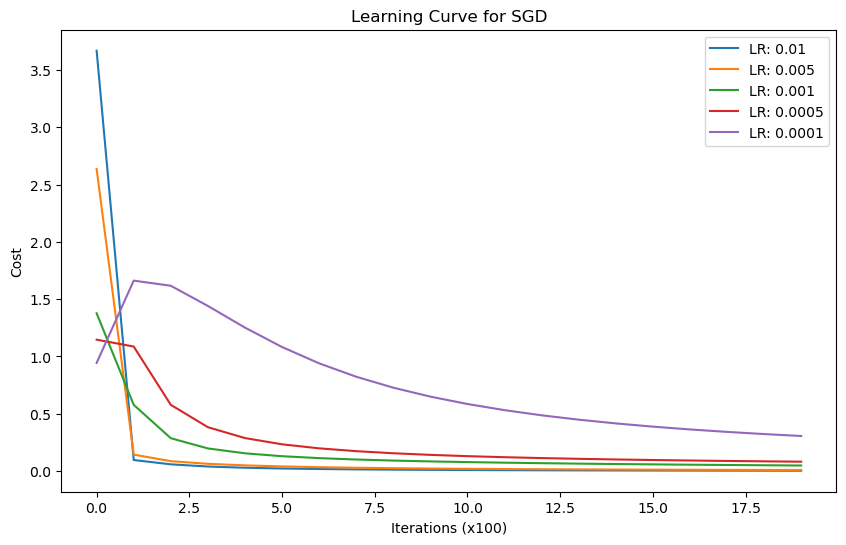

In [23]:
plt.figure(figsize=(10,6))
for lr in learning_rates:
    d = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=lr, print_cost=False, method='SGD')
    plt.plot(d["costs"], label=f"LR: {lr}")

plt.title(f'Learning Curve for SGD')
plt.xlabel('Iterations (x100)')
plt.ylabel('Cost')
plt.legend()
plt.show()

train accuracy: 94.24102381798791 %
test accuracy: 73.66737739872069 %
train accuracy: 93.672236046925 %
test accuracy: 73.98720682302772 %
train accuracy: 90.47280483469605 %
test accuracy: 74.09381663113007 %
train accuracy: 88.62424457874155 %
test accuracy: 74.84008528784648 %
train accuracy: 82.47422680412372 %
test accuracy: 75.47974413646055 %


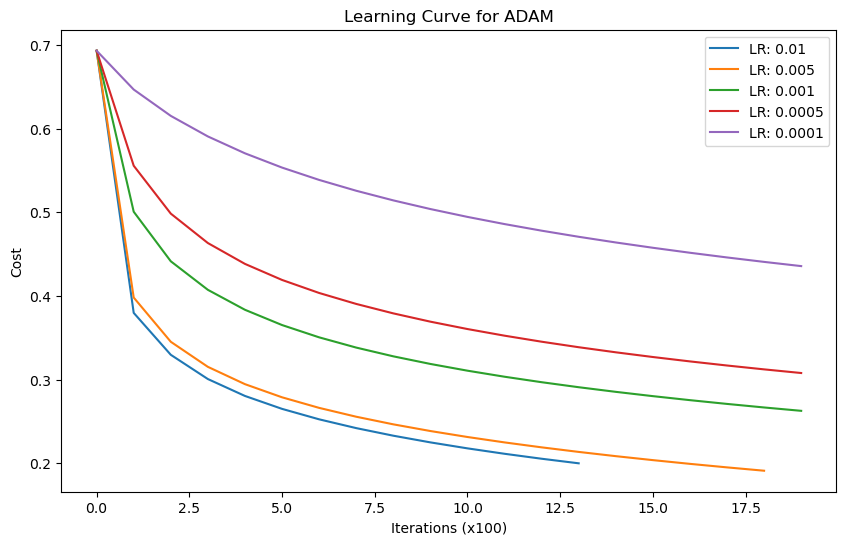

In [24]:
plt.figure(figsize=(10,6))
for lr in learning_rates:
    d = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=lr, print_cost=False, method='ADAM')
    plt.plot(d["costs"], label=f"LR: {lr}")

plt.title(f'Learning Curve for ADAM')
plt.xlabel('Iterations (x100)')
plt.ylabel('Cost')
plt.legend()
plt.show()

train accuracy: 78.99040170636331 %
test accuracy: 76.22601279317698 %
train accuracy: 77.07074297902595 %
test accuracy: 74.6268656716418 %
train accuracy: 73.16032705296836 %
test accuracy: 71.96162046908316 %
train accuracy: 68.9655172413793 %
test accuracy: 71.1087420042644 %
train accuracy: 55.31461073586918 %
test accuracy: 57.569296375266525 %
train accuracy: 93.81443298969072 %
test accuracy: 72.60127931769722 %
train accuracy: 93.38784216139354 %
test accuracy: 73.34754797441364 %
train accuracy: 90.79274795591894 %
test accuracy: 74.6268656716418 %
train accuracy: 89.22858158549592 %
test accuracy: 74.6268656716418 %
train accuracy: 86.27799502310701 %
test accuracy: 76.33262260127933 %
train accuracy: 94.24102381798791 %
test accuracy: 73.66737739872069 %
train accuracy: 93.672236046925 %
test accuracy: 73.98720682302772 %
train accuracy: 90.47280483469605 %
test accuracy: 74.09381663113007 %
train accuracy: 88.62424457874155 %
test accuracy: 74.84008528784648 %
train accura

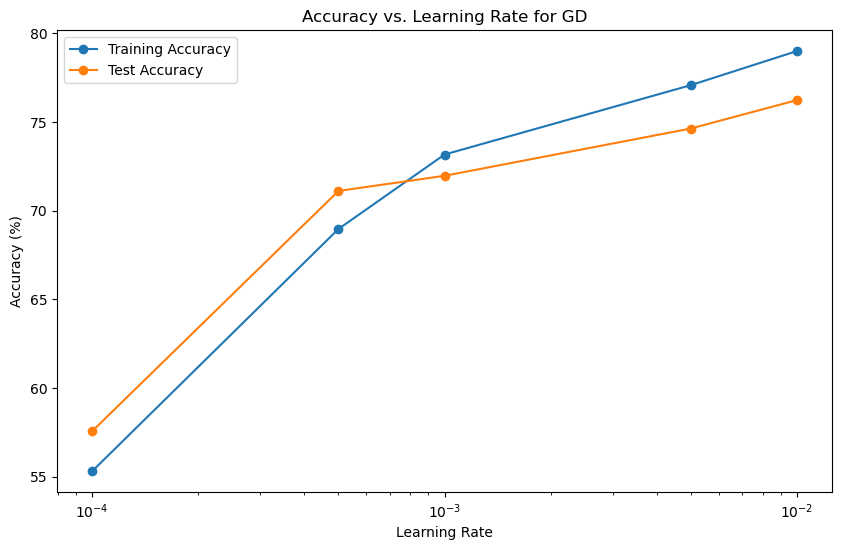

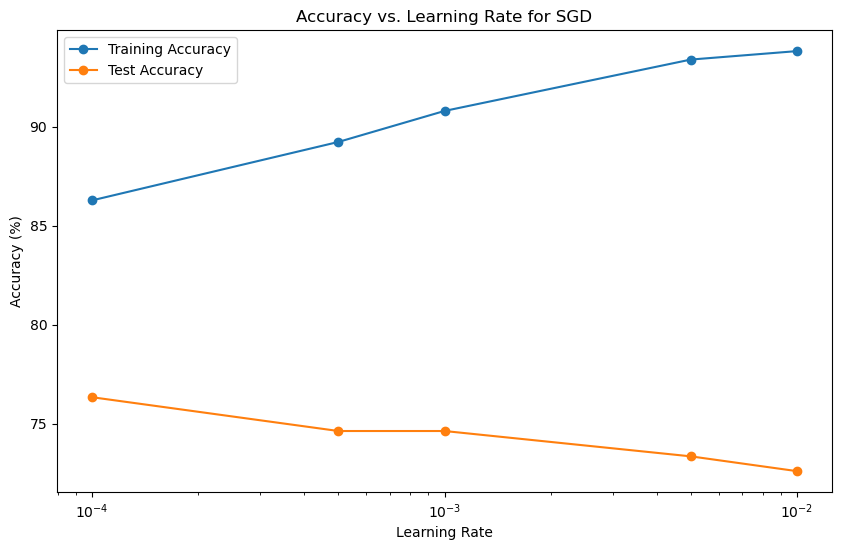

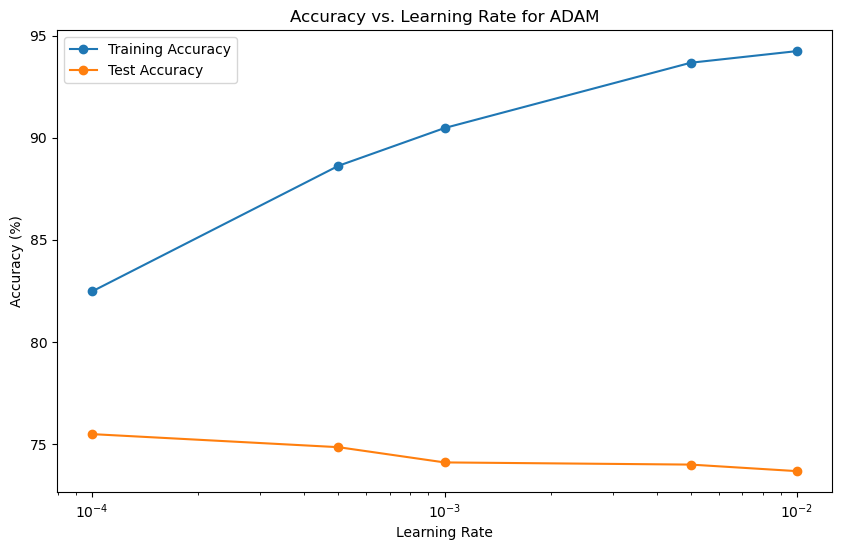

In [25]:
train_accuracies = []
test_accuracies = []

methods = ['GD', 'SGD', 'ADAM']

for method in methods:
    train_acc_method = []
    test_acc_method = []
    
    for lr in learning_rates:
        d = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=lr, print_cost=False, method=method)
        train_acc = 100 - np.mean(np.abs(d["Y_prediction_train"] - y_train)) * 100
        test_acc = 100 - np.mean(np.abs(d["Y_prediction_test"] - y_test)) * 100
        
        train_acc_method.append(train_acc)
        test_acc_method.append(test_acc)
    
    train_accuracies.append(train_acc_method)
    test_accuracies.append(test_acc_method)

for i, method in enumerate(methods):
    plt.figure(figsize=(10,6))
    plt.plot(learning_rates, train_accuracies[i], '-o', label='Training Accuracy')
    plt.plot(learning_rates, test_accuracies[i], '-o', label='Test Accuracy')
    plt.xscale('log')
    plt.title(f'Accuracy vs. Learning Rate for {method}')
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.show()


**How does it affect the accuracy of the model?**

In SGD and GD, the learning rate determines the step size in parameter space when updating parameters, with a fixed rate potentially leading to slower convergence or overshooting. In ADAM, the learning rate is adaptively adjusted for each parameter based on the historical gradient information, providing more nuanced and efficient updates.

Learning rates: [0.01, 0.005, 0.001, 0.0005, 0.0001]

1. GD
- Learning rate of 0.01 performs best
- Low learning rate shows very small convergence
- Learning rate too high may cause overshooting, but in our case the highest learning rate is the best

2. SGD
- Here the lowest learning rate of 0.0001 performs best
- In general performs better than GD
- The convergence in the case of learning rate = 0.0001 is decent

3. ADAM
- Here the lowest learning rate of 0.0001 performs best
- Slightly worse than SGD
- Convergence is qustionable for 0.0001

# Part IV

**Compare the accuracy of the models fitted with various BP algorithms.**

train accuracy: 78.99040170636331 %
test accuracy: 76.22601279317698 %
train accuracy: 77.07074297902595 %
test accuracy: 74.6268656716418 %
train accuracy: 73.16032705296836 %
test accuracy: 71.96162046908316 %
train accuracy: 68.9655172413793 %
test accuracy: 71.1087420042644 %
train accuracy: 55.31461073586918 %
test accuracy: 57.569296375266525 %
train accuracy: 93.81443298969072 %
test accuracy: 72.60127931769722 %
train accuracy: 93.38784216139354 %
test accuracy: 73.34754797441364 %
train accuracy: 90.79274795591894 %
test accuracy: 74.6268656716418 %
train accuracy: 89.22858158549592 %
test accuracy: 74.6268656716418 %
train accuracy: 86.27799502310701 %
test accuracy: 76.33262260127933 %
train accuracy: 94.24102381798791 %
test accuracy: 73.66737739872069 %
train accuracy: 93.672236046925 %
test accuracy: 73.98720682302772 %
train accuracy: 90.47280483469605 %
test accuracy: 74.09381663113007 %
train accuracy: 88.62424457874155 %
test accuracy: 74.84008528784648 %
train accura

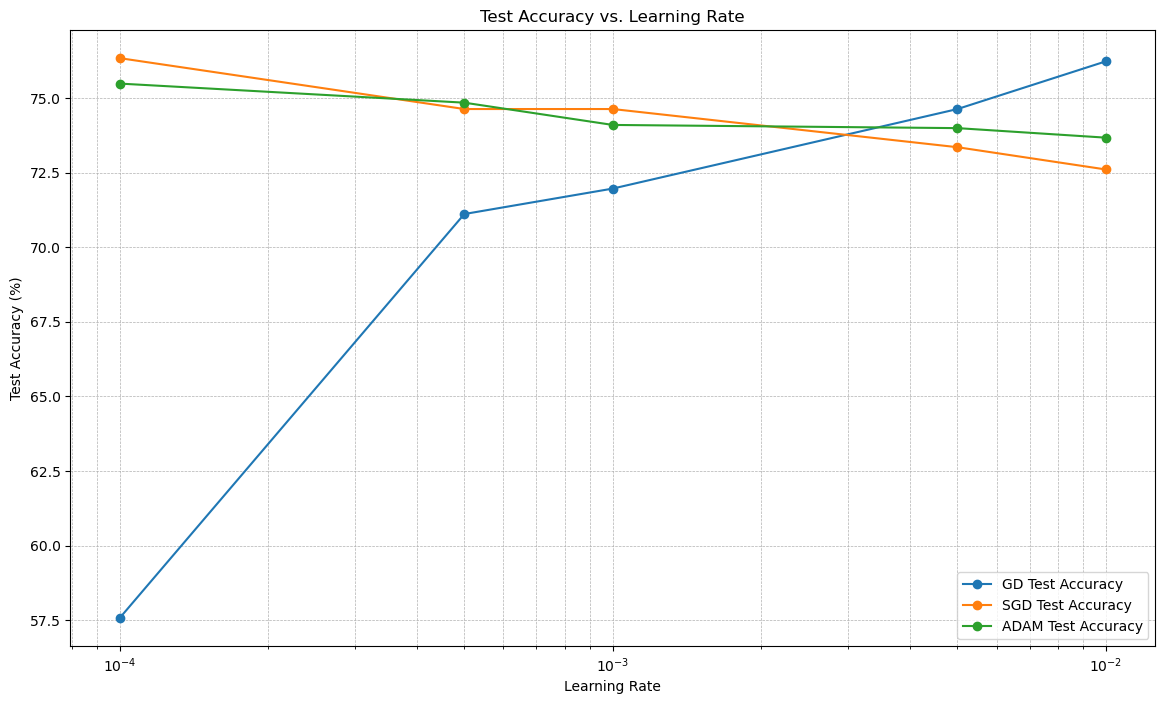

In [26]:
# Dictionary to store accuracies
results = {
    "Method": [],
    "Learning Rate": [],
    "Training Accuracy": [],
    "Test Accuracy": []
}

# Running the models and storing results
for method in methods:
    for lr in learning_rates:
        d = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=lr, print_cost=False, method=method)
        
        train_acc = 100 - np.mean(np.abs(d["Y_prediction_train"] - y_train)) * 100
        test_acc = 100 - np.mean(np.abs(d["Y_prediction_test"] - y_test)) * 100
        
        results["Method"].append(method)
        results["Learning Rate"].append(lr)
        results["Training Accuracy"].append(train_acc)
        results["Test Accuracy"].append(test_acc)

# Convert the results dictionary to a DataFrame
df = pd.DataFrame(results)

# Displaying the DataFrame for a tabular view
print(df)

# Plotting the results
plt.figure(figsize=(14, 8))
for method in methods:
    subset = df[df["Method"] == method]
    plt.plot(subset["Learning Rate"], subset["Test Accuracy"], '-o', label=f'{method} Test Accuracy')
    
plt.xscale('log')
plt.title('Test Accuracy vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy (%)')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

The table showcases the training and test accuracies for three optimization methods—GD, SGD, and ADAM—across different learning rates. For GD, as the learning rate decreases, both training and test accuracies generally drop, indicating that smaller steps may not be optimizing the function well. On the other hand, SGD and ADAM exhibit higher training accuracies compared to GD, especially at larger learning rates.

Overfitting occurs when a model performs exceptionally well on training data but fails to generalize effectively to new, unseen data, resulting in poorer test performance. In the table, while SGD and ADAM have high training accuracies, their test accuracies are relatively close, but notably lower. This discrepancy indicates that the models might be fitting too closely to the nuances and noise of the training data, rather than capturing the underlying distribution. The closeness of test accuracies for SGD and ADAM, despite high training accuracies, suggests that while these methods optimize the training set well, they might not be generalizing as effectively to the test set, pointing towards potential overfitting.

**SGD with the learning rate = 0.0001 is the best with the accuracy of 76.33**